1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


2. Load Dataset

In [53]:
file_path = "dataset.csv"  
df = pd.read_csv(file_path)

3. Data Cleaning & Preprocessing

In [54]:
df["OUTPUT"] = df["OUTPUT"].str.strip().str.upper()
X = df.drop(columns=["OUTPUT"])
y = df["OUTPUT"]


4. Visualisasi Boxplot untuk distribusi data

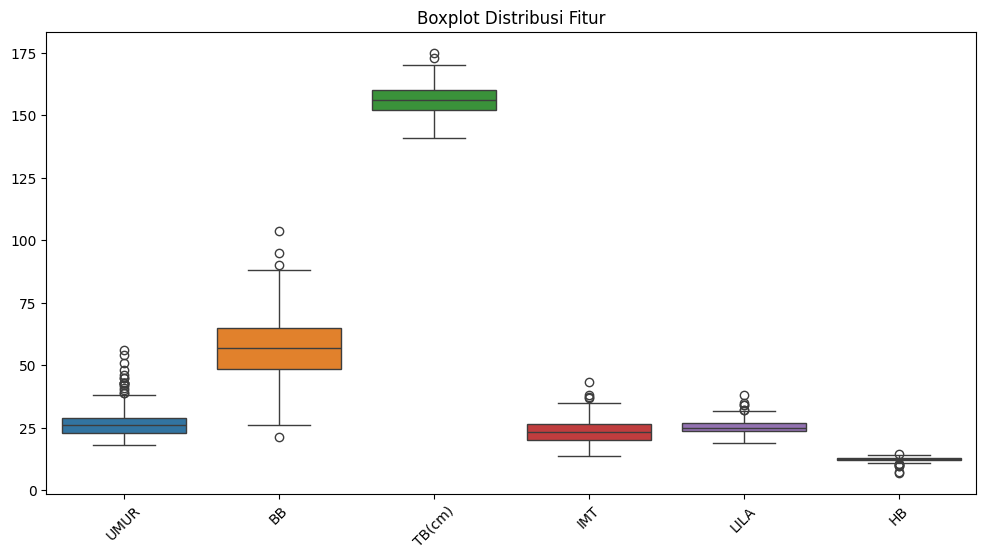

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title("Boxplot Distribusi Fitur")
plt.show()


5. Heatmap Korelasi

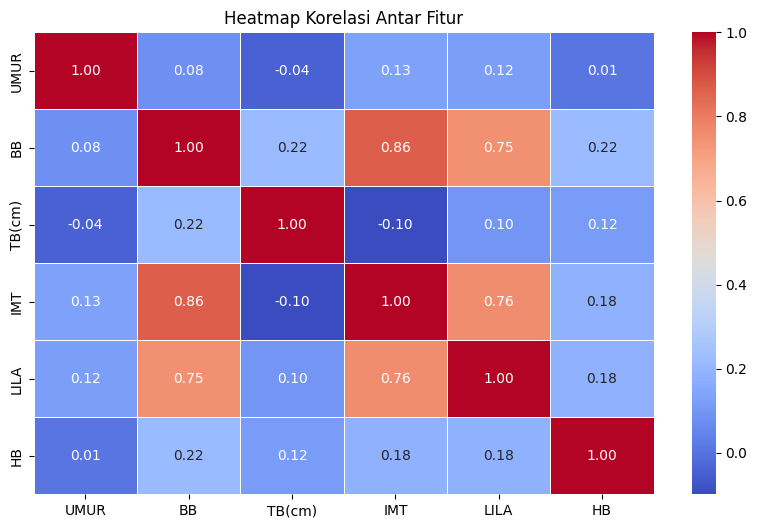

In [56]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


In [57]:
print(y.value_counts())  # Melihat distribusi kelas

OUTPUT
SEHAT     156
KEK         9
RINGAN      7
BERAT       2
Name: count, dtype: int64


6. Oversampling dengan SMOTE

In [58]:
smote = SMOTE(sampling_strategy="not majority", random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)


7. Split dataset menjadi train (80%) dan test (20%)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


8. Train Model (Random Forest)

In [60]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

9. Prediksi Data Test

In [61]:
y_pred = model.predict(X_test)

10. Evaluasi Model

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

       BERAT       0.97      1.00      0.99        39
         KEK       0.92      0.96      0.94        23
      RINGAN       1.00      1.00      1.00        32
       SEHAT       0.97      0.90      0.93        31

    accuracy                           0.97       125
   macro avg       0.96      0.96      0.96       125
weighted avg       0.97      0.97      0.97       125



In [63]:
df

,UMUR,BB,TB(cm),IMT,LILA,HB,OUTPUT
0,46,65.0,156.0,26.71,28.0,12.0,SEHAT
1,29,73.0,165.0,26.81,28.0,13.1,SEHAT
2,18,62.0,165.0,22.77,25.0,11.2,SEHAT
3,26,61.0,161.0,23.53,25.0,12.9,SEHAT
4,24,49.0,152.0,21.21,24.0,13.0,SEHAT
...,...,...,...,...,...,...,...
169,21,59.0,156.0,24.20,24.0,12.8,SEHAT
170,19,43.9,148.0,20.00,22.0,9.5,BERAT
171,29,65.5,165.0,24.06,26.0,12.4,SEHAT
172,21,56.7,148.0,25.80,27.5,12.7,SEHAT


11. CONFUSION MATRIX


Confusion Matrix:
 [[39  0  0  0]
 [ 0 22  0  1]
 [ 0  0 32  0]
 [ 1  2  0 28]]


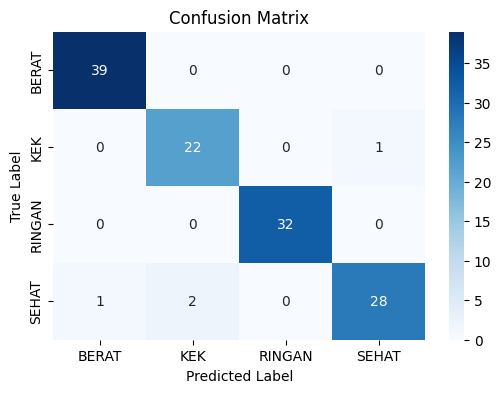

In [64]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# --- 11. Visualisasi Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [65]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold CV
print("Cross-validation accuracy:", cross_val_scores.mean())


Cross-validation accuracy: 0.9639797979797979


12. Simpan Model untuk Penggunaan Selanjutnya

In [68]:
with open("model_rf_smote.pkl","wb") as file:
    pickle.dump(model, file)

In [69]:
import pickle
model_path = "model_rf_smote.pkl"

with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)
    
    print(type(loaded_model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
